# 크롤링 -과제
# < 쿠클루 크롤링해서, 점수와 리뷰 분석할 사람에게 떠먹여주기 >

### 크롤링에 앞서 : 밑의 강의 학습하면 좋아요. 크롤링 명강의로 꼽히는 튜토리얼.
[https://www.youtube.com/watch?v=p1iX0uxM1w8]

### 막히는 부분은 카톡이나 스터디시에 물어봐주세요

#### 1. http://klue.kr/lecture/92579 , 쿠클루 주소는 http://klue.kr/lecture/ + 엔트리번호, 이렇게 이루어져 있습니다. (중요 하지만, 로그인이 되지 않은채로 요청하면 html을 주지 않습니다.)

#### 2. 엔트리번호 (92479 ~ ) 100개를 크롤링해서. (셀레늄 웹드라이버로 로그인하기 => 드라이버한테 주소 100개를 하나씩 입력하여 => 각 url에서 html을 다운 받고, 강의에 나오는 파싱하는 것으로 원하는 것을 얻어내시면 됩니다.)

#### 3. 아래와 같은 표로 정리해주세요.

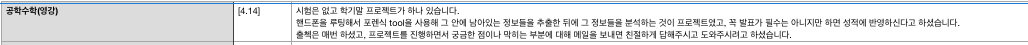

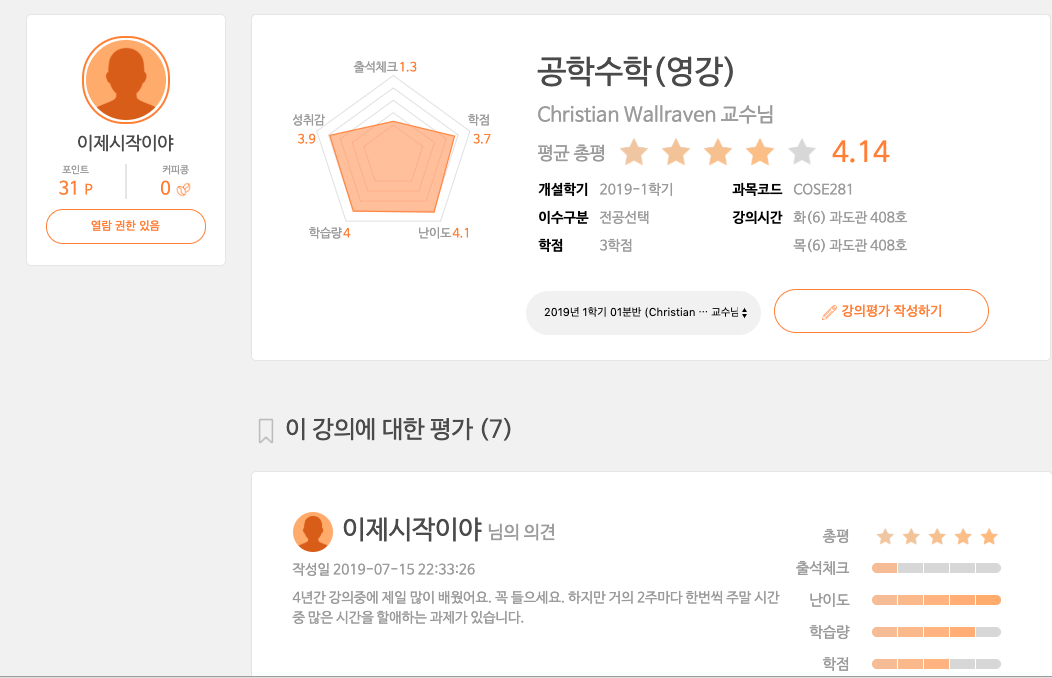

# 최종형태 csv file
### 과목명 | 강의총평(강의당 1개 있을뿐) | 강의평 하나당 텍스트
### 공학수학 | 4.14 | "4년간 강의중에 제일 많이 배웠어요. 꼭 들으세요. 하지만 ~~ 있습니다."
### 공학수학 | 4.14 | "리뷰2"
### 공학수학 | 4.14 | "리뷰3"
### 공학수학 | 4.14 | "리뷰4"
### 공학수학 | 4.14 | "리뷰5"
### 갯수만큼을 파이썬으로 모아서,  "100_reviews.csv" 파일에 쓰고 7616tjrgml@naver.com 으로 보내주세요.

# < 힌트 >
## 밑에는 비슷한 ~ , 같은 목적은 아님 / 부분 부분 같은 역할을 해주는 코드의 조각들이 있습니다. (예시 : csv파일에 쓰기)
## 어떤 거는 필요하고 어떤 거는 필요없어요.
## 필요하면 복붙하시면 되요.

In [11]:
# Import modules to use
from selenium import webdriver
import bs4
driver = webdriver.Chrome('/Users/sucky/Desktop/chromedriver') # CUSTOM SETTING
import selenium.webdriver as webdriver
import selenium.webdriver.support.ui as ui
from selenium.webdriver.common.keys import Keys
from time import sleep
# Download 'alert control' in Chrome browser and change setting to block all alerts.

#  Log-in to the site for authentification to use the info. inside.
klue_url = "http://klue.kr/"
driver.get(klue_url)
driver.find_element_by_xpath("/html/body/app-root/menubar/div/ul/menubar-guest/span[2]").click()
i_d = driver.find_element_by_xpath("/html/body/app-root/app-modal/div/div/div/modal-contents/div/modal-login/input[1]")
i_d.send_keys("7616tjrgml")
password = driver.find_element_by_xpath("/html/body/app-root/app-modal/div/div/div/modal-contents/div/modal-login/input[2]")
password.send_keys("dnsdud06!")
driver.find_element_by_xpath('/html/body/app-root/app-modal/div/div/div/modal-contents/div/modal-login/button').click()

## STEP2. assign 5000 urls per a batch. 
- To error-check in the middle of batches

In [14]:
#  Make batches for preventing overheating of my Macbook.

#  Make batches with range function
batches = [range(40000,40005), range(40005,40011), range(82491,82495)] # set your own. this is only for testing

## STEP3. Iterate, Crawl, and directly write the collected infos to csv file.

In [15]:
# Open CSV, CSV WRITER
import csv
f = open('kopas_score_review_dataset_{}.csv'.format(0), 'w', encoding='utf-8', newline='')
wr = csv.writer(f)

# Iterate on websites of each lecture number in klue.kr
for i in batches[1]:
        lec_url = 'http://klue.kr/lecture/{}'.format(i)
        driver.get(lec_url)
        driver.implicitly_wait(4)
        
        # record lec_num in url
        lec_num = i
        
        # get html text and parse
        html = driver.page_source # get whole html text
        soup = bs4.BeautifulSoup(html)
        review_boxes_list = soup.find_all('div', {'class':'lecture-detail-content'})
            
        # If there are none of review-score box => go on to next in loop ex).http://klue.kr/lecture/42600)
        if len(review_boxes_list) == 0 : 
            print('no contents at {}th page.'.format(lec_num))
            continue
            
        # If there are at least one or more of review - score box go on in this loop
        else :
            
            for i in review_boxes_list:

                    # Review text attained
                rev_str = i.find('div', {'class':'lecture-eval-content-context'}).text # 리뷰 텍스트 추출
    
                    # 5 Areas Scores list
                five_area_scores = [] 
                htmls_for_five_scores = (i.find_all('div', {'class':'slider-klue-outer'}))[1:6]
    
                    # Get the 5 scores values and append it to scores_for_five_areas
                for i in htmls_for_five_scores :

                    string = i.get('style')
                    lst = string.split(';')
                    the_string = lst[1]

                    if the_string.endswith('%'):  # In case the score is written like 100% 80%

                        int_score = int(the_string[-4:-1:1])//20
                        five_area_scores.append(int_score)

                    else:  # Incase it's written like 104px, 130px.

                        int_score = int(the_string[-5:-2:1])//26
                        five_area_scores.append(int_score)
                        
                # We just collected review string and 5 scores list, write it into csv file for this batch.
                wr.writerow([lec_num, five_area_scores, rev_str])


# Close CSV file.
f.close()


no contents at 40009th page.


# Done ! collected all 5types of review scores with corresponding review text.